<a href="https://colab.research.google.com/github/SYasheel/AutomaticSleepScoring/blob/main/Yasheel/emd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this file is being used to apply the emd sifting thing config/theta-gamma stuff, we will use rat6_pt4 because we have used that in the previous attempt of overlaid plots(comparison),

mask sifting application for selecting delta cycles

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
os.chdir('/content/drive/MyDrive/cn/donders/')

In [ ]:
os.chdir('/content/drive/MyDrive/')

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/cn/donders/Nikhil')

here we also plot the IF(instantaneouos frequency) histogram : to identify the threshold mask_sift frequency

In [ ]:
#just posttrial 5 data, rat9 pfc
rat = '9'
region = 'pfc'
path_to_data = '/content/drive/MyDrive/cn/donders/rat9_orn/'
data_file = 'Cleaned_Trial5_PFC_100_CH30.continuous.mat'
states_file = '2018-06-27_13-57-02_Post_trial5-states.mat'
data5, sleep_scoring5 = load_mat_data(path_to_data, data_file, states_file)

In [ ]:
data5 = (data5 - np.mean(data5)) / np.std(data5)

In [ ]:
fs = 2500

In [ ]:
filtered_data5 = filter_signal(data5, fs, 'bandpass', (0.1, 5),filter_type='iir', butterworth_order=6)
# filtered_data5 = filter_signal(data5, fs, 'bandpass', (0.1, 4),filter_type='fir')
IP5, IF5, IA5 = emd.spectra.frequency_transform(filtered_data5, fs, 'hilbert')

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(9, 5))
plt.hist(IF5[:, 0], bins=100, range=(0.01, 6))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count')
plt.title('IF5(0.1 -5 Hz), rat9/pt5/pfc)')
plt.show()

counts, bin_edges = np.histogram(IF5[:, 0], bins=100, range=(0.01, 5))
peak_index = np.argmax(counts)
peak_value = (bin_edges[peak_index] + bin_edges[peak_index+1]) / 2

print(f"Peak frequency value: {peak_value:.4f} Hz")

In [ ]:
!pip install emd
!pip install neurodsp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import os

# Import custom functions
from scripts.functions import *

In [ ]:
rat='6'
region='PFC'
path_to_data = '/content/drive/MyDrive/cn/donders/rat6_orn/'
data_file='Cleaned_Trial4_PFC_100_CH33.continuous.mat'
states_file='2018-03-01_13-05-56_post_trial4-states.mat'
data4, sleep_scoring4 = load_mat_data(path_to_data, data_file, states_file)

In [ ]:
import matplotlib.pyplot as plt

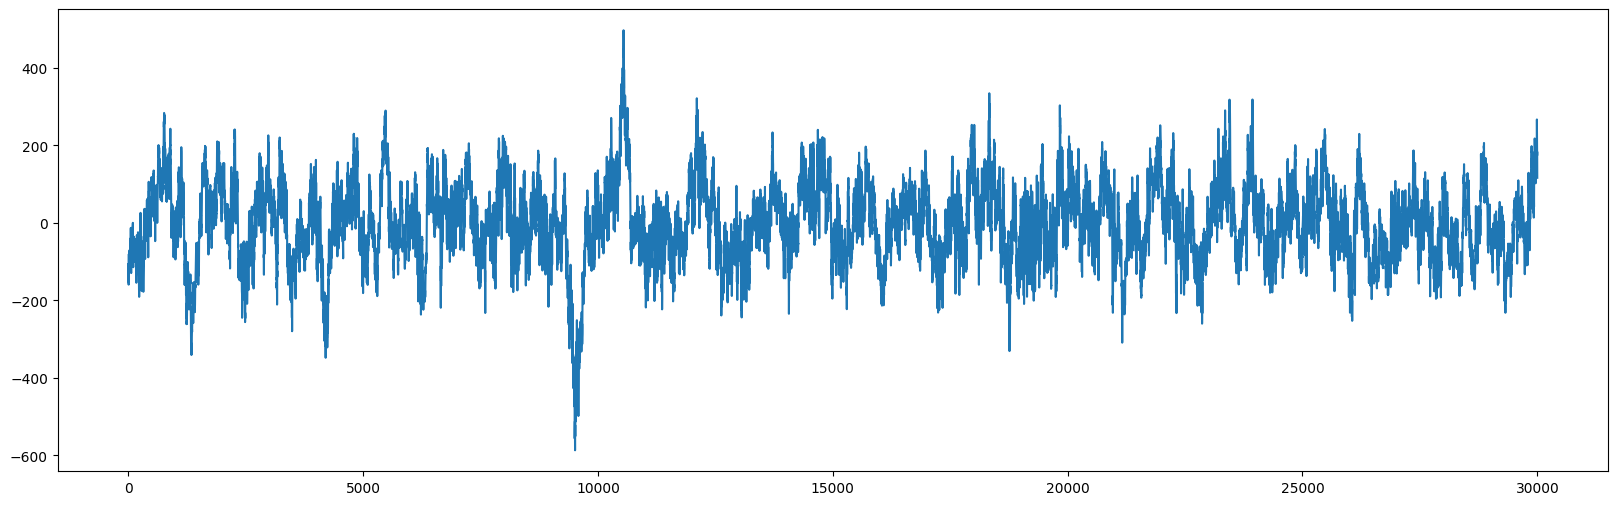

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data4[10000:40000])

In [ ]:
data4 = (data4 - np.mean(data4)) / np.std(data4)

In [ ]:
data4_pseudo=data4[10000:40000]

first section is implementing mask-sift using customized configuration file

In [ ]:
config_file=emd.sift.SiftConfig.from_yaml_file('/content/drive/MyDrive/cn/donders/emd_masksift_CA1_config_2500_deltamodified7hz.yml')

In [ ]:
print(config_file)

mask_sift <class 'emd.sift.SiftConfig'>
mask_amp : 1
mask_amp_mode : ratio_sig
mask_freqs : [0.0028, 0.0014, 0.0007, 0.0112, 0.00035, 0.000175, 0.0, 0.0, 0.0, 0.0, 0.0]
mask_step_factor : 2
nphases : 4
ret_mask_freq : True
max_imfs : 6
sift_thresh : 1e-08
nprocesses : 4
imf_opts:
    sd_thresh : 0.05
    env_step_size : 1
    stop_method : rilling
envelope_opts:
    interp_method : mono_pchip
extrema_opts:
    pad_width : 2
    parabolic_extrema : False
    mag_pad_opts : {'mode': 'median', 'stat_length': 1}
    loc_pad_opts : {'mode': 'reflect', 'reflect_type': 'odd'}


In [ ]:
config_file.pop('mask_freq', None)

In [ ]:
#config_file['mask_freqs']=[0.0028, 0.0014, 0.0007, 0.0112, 0.00035, 0.000175, 0.0, 0.0, 0.0, 0.0, 0.0] # this is mask_if for highest mask_freq==7hz
config_file['mask_freqs']=[0.001, 0.0005, 0.00025, 0.000125, 0.0000625, 0.00003125, 0.0, 0.0, 0.0, 0.0, 0.0]#for 2.5

In [ ]:
config_file['max_imfs']=12

In [ ]:
print(config_file)

mask_sift <class 'emd.sift.SiftConfig'>
mask_amp : 1
mask_amp_mode : ratio_sig
mask_freqs : [0.001, 0.0005, 0.00025, 0.000125, 6.25e-05, 3.125e-05, 0.0, 0.0, 0.0, 0.0, 0.0]
mask_step_factor : 2
nphases : 4
ret_mask_freq : True
max_imfs : 12
sift_thresh : 1e-08
nprocesses : 4
imf_opts:
    sd_thresh : 0.05
    env_step_size : 1
    stop_method : rilling
envelope_opts:
    interp_method : mono_pchip
extrema_opts:
    pad_width : 2
    parabolic_extrema : False
    mag_pad_opts : {'mode': 'median', 'stat_length': 1}
    loc_pad_opts : {'mode': 'reflect', 'reflect_type': 'odd'}


z scoring wont change te shape of anything, it is just scaling


In [ ]:
fs = 2500 # Set sampling Frequency if different

In [ ]:
data4.shape

(6751360,)

because i ma encountering some overflow erros with complete data, let us rathe use a 12 second window starting from sample 10000 to 40000



In [ ]:
from functools import partial
my_mask_sift = partial(emd.sift.mask_sift, **config_file)

Masked Sift Instantaneous Frequency Setting


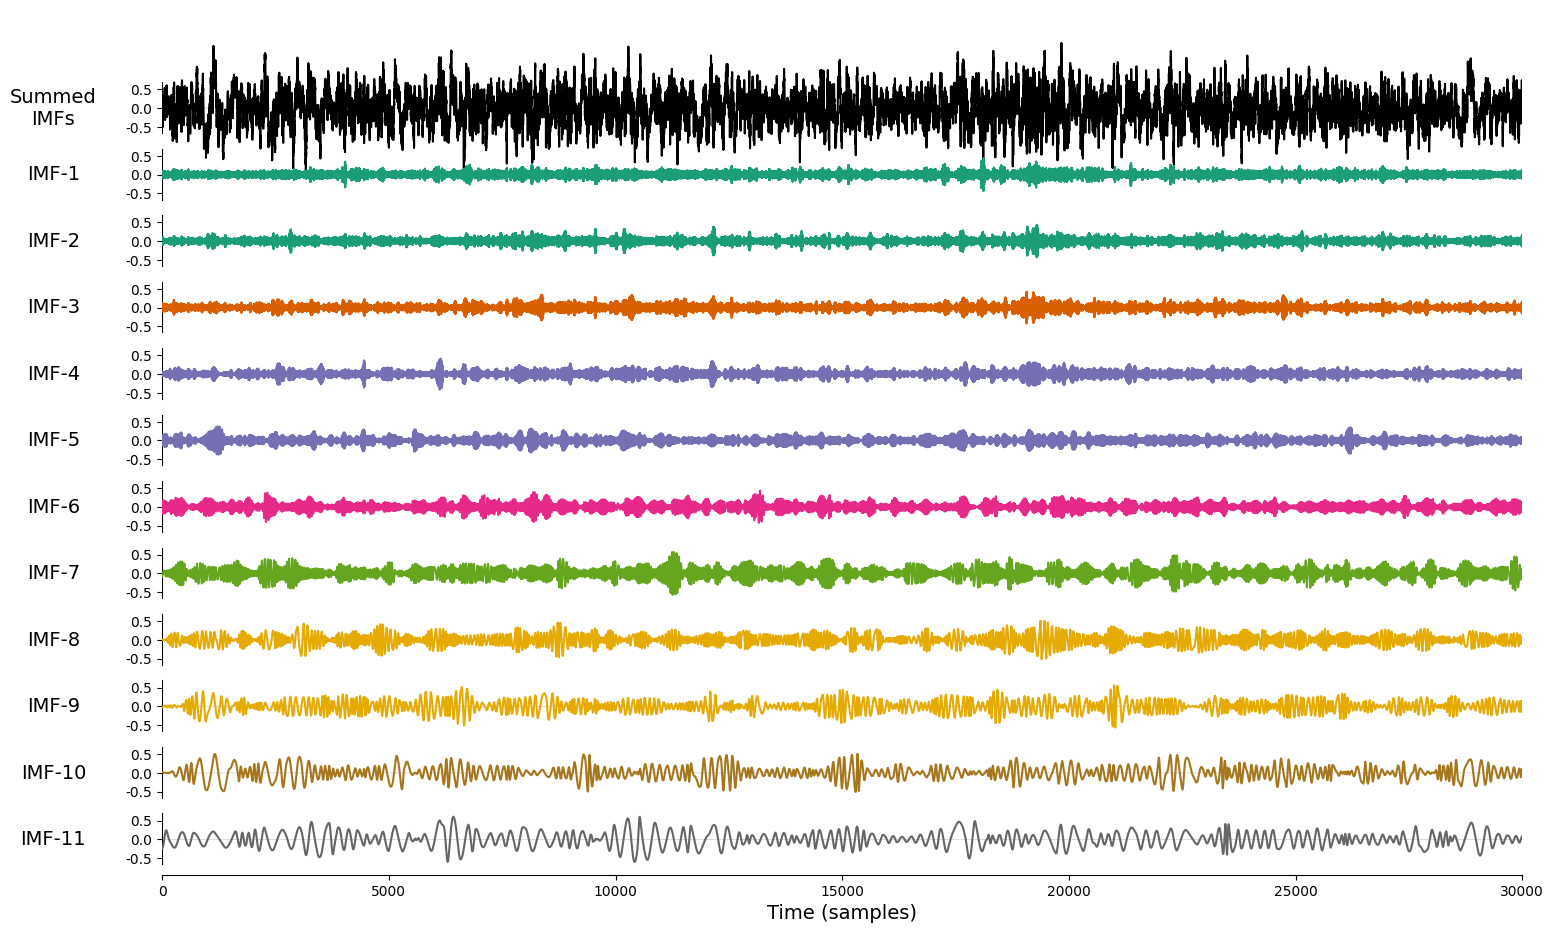

In [ ]:
print('Masked Sift Instantaneous Frequency Setting')

maskif=my_mask_sift(data4_pseudo)
maskiffig=emd.plotting.plot_imfs(maskif[0][:30000,:]).get_figure()

In [ ]:
#  function to calcuclate the average frequencies of each IMF
def imf_freq(imf,sample_rate,mode='nht'):
  _,IF,_=emd.spectra.frequency_transform(imf,sample_rate,'nht')
  freq_vec=np.mean(IF,axis=0)
  return freq_vec

In [ ]:
#array is the first element of the tuple
maskif_array = maskif[0]

print(type(maskif_array))

<class 'numpy.ndarray'>


In [ ]:
maskif_array.shape

(30000, 11)

In [ ]:
sift_mask_freq=imf_freq(maskif_array, fs)
print(f'2.5Hz config file{sift_mask_freq} in Hz')

2.5Hz config file[684.08488299 446.51546595 301.20979178 207.21378697 139.74033657
  94.3250682   62.64701699  43.15795929  28.66358935  18.23715626
  11.06906427] in Hz


the following second seciton is just implementing mask_sift but with default config file because in the above case the raw data was not gtting reconstructed well and frequency values were shady



In [ ]:
imf, mask_freqs = emd.sift.mask_sift(data4_pseudo, mask_freqs=2.5/fs, ret_mask_freq=True, max_imfs=12)


<Axes: xlabel='Time (samples)'>

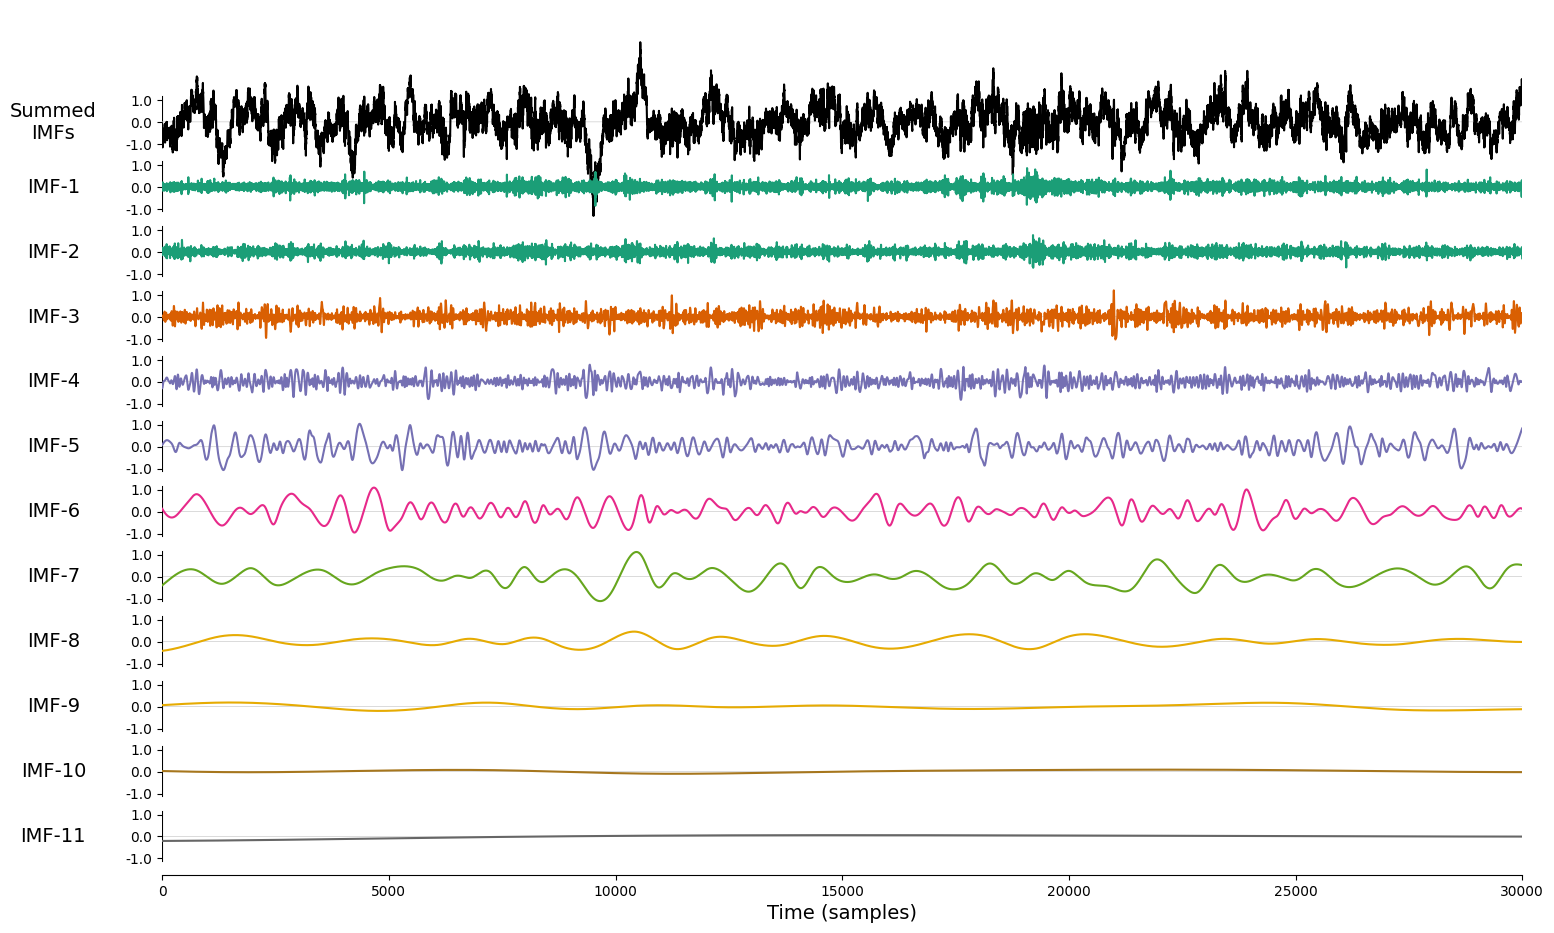

In [ ]:
emd.plotting.plot_imfs(imf)

In [ ]:
sift_mask_freq=imf_freq(imf, fs)
print(f'2.5Hz default config file{sift_mask_freq} in Hz')

2.5Hz default config file[5.48346371e+02 2.38207069e+02 8.18135261e+01 3.33969954e+01
 1.13224675e+01 4.66292421e+00 2.07499164e+00 9.94744272e-01
 4.11747557e-01 2.38948430e-01 7.91150932e-02] in Hz
